In [1]:
# all imports, numpy, scipy, matplotlib, seaborn, pandas, plotly


import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import sklearn 
import os
from matplotlib import cm as colours 
from colorama import Fore, Back, Style
from scipy.stats import sem
import joblib
from scipy.stats import ttest_rel, ttest_ind

In [2]:
# load kumar mfa dataframe

#Accuracy_df_Kumar_MFA = pd.read_csv(r"C:\Users\amh209\Box\Academic-Duke\CoganLab\Summer 2024\intraop\ieeg_data_intraop\Accuracy_df_Kumar_MFA.csv")
Accuracy_df_Kumar_MFA = pd.read_csv(r"C:\Users\Nabiya\Box\Academic-Duke\CoganLab\Summer 2024\intraop\ieeg_data_intraop\Accuracy_df_Kumar_MFA.csv")
# rename column name from method to Annotator 

Accuracy_df_Kumar_MFA = Accuracy_df_Kumar_MFA.rename(columns= {'Method': "Aligner"})
# change the values inside column position to make them all capital letters
Accuracy_df_Kumar_MFA['Position'] = Accuracy_df_Kumar_MFA['Position'].str.upper()
# change kumar to human 
Accuracy_df_Kumar_MFA['Aligner'] = Accuracy_df_Kumar_MFA['Aligner'].replace('Kumar', 'Human')
print(Accuracy_df_Kumar_MFA.head(20))
# print shape of the dataframe
print(Accuracy_df_Kumar_MFA.shape)

   Patient Position Aligner  Accuracy
0      S14       P1   Human  0.604167
1      S14       P1   Human  0.576389
2      S14       P1   Human  0.583333
3      S14       P1   Human  0.569444
4      S14       P1   Human  0.597222
5      S14       P1   Human  0.576389
6      S14       P1   Human  0.576389
7      S14       P1   Human  0.597222
8      S14       P1   Human  0.604167
9      S14       P1   Human  0.611111
10     S14       P1     MFA  0.398649
11     S14       P1     MFA  0.405405
12     S14       P1     MFA  0.385135
13     S14       P1     MFA  0.398649
14     S14       P1     MFA  0.378378
15     S14       P1     MFA  0.425676
16     S14       P1     MFA  0.405405
17     S14       P1     MFA  0.385135
18     S14       P1     MFA  0.405405
19     S14       P1     MFA  0.371622
(300, 4)


## All Positions All Patients Kumar vs. MFA

TtestResult(statistic=3.3050835607200084, pvalue=0.0011894849927106149, df=149)


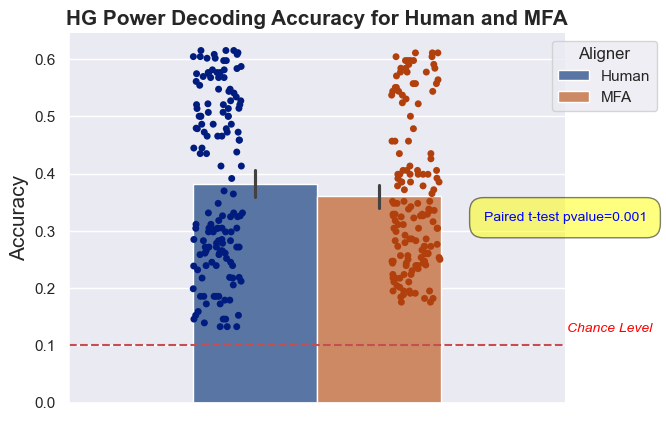

TtestResult(statistic=-1.8153461804874889, pvalue=0.07198894125675312, df=119)


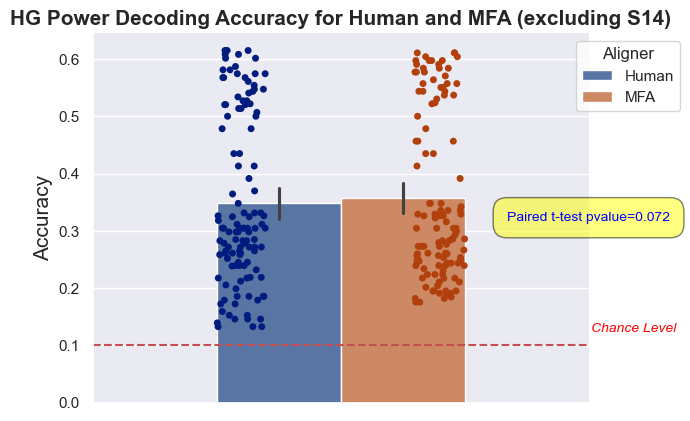

In [3]:
kumar_array = Accuracy_df_Kumar_MFA[Accuracy_df_Kumar_MFA['Aligner'] == 'Human']['Accuracy']
mfa_array = Accuracy_df_Kumar_MFA[Accuracy_df_Kumar_MFA['Aligner'] == 'MFA']['Accuracy']

result = ttest_rel(kumar_array, mfa_array)
print(result)


# plot the accuracies as a barplot. for now, let's not separate by patient nor position. just hueing by method
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots()
sns.barplot(data=Accuracy_df_Kumar_MFA, hue='Aligner', y='Accuracy', ax=ax, width=0.5)
sns.stripplot(data=Accuracy_df_Kumar_MFA, hue='Aligner', y='Accuracy', ax=ax, dodge=True, legend=False, palette='dark')
# baseline level is basically 1/9. add a baseline/ chance level
plt.axhline(y = 0.1, color = 'r', linestyle = '--')

ax.set_title('HG Power Decoding Accuracy for Human and MFA', fontsize=15, fontweight='bold', fontname='Arial')
ax.set_ylabel('Accuracy', fontsize=15)
# put the pvalue up there
ax.text(1, 0.5, f"Paired t-test pvalue={result.pvalue:.3f}", fontsize=10, ha='center', va='center', transform=ax.transAxes,
        color='blue', bbox=dict(facecolor='yellow', alpha=0.5, edgecolor='black', boxstyle='round,pad=1'))
ax.text(1.09, 0.2, f"Chance Level", fontsize=10, ha='center', va='center', transform=ax.transAxes,
        fontstyle='italic', color='red')
# put legend outside the plot
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1), title='Aligner')
sns.despine()

plt.show()

# repeat this analysis but excluding patient S14

Accuracy_df_Kumar_MFA_noS14 = Accuracy_df_Kumar_MFA[Accuracy_df_Kumar_MFA['Patient'] != 'S14']

kumar_array_noS14 = Accuracy_df_Kumar_MFA_noS14[Accuracy_df_Kumar_MFA_noS14['Aligner'] == 'Human']['Accuracy']
mfa_array_noS14 = Accuracy_df_Kumar_MFA_noS14[Accuracy_df_Kumar_MFA_noS14['Aligner'] == 'MFA']['Accuracy']

result_noS14 = ttest_rel(kumar_array_noS14, mfa_array_noS14)
print(result_noS14)

fig, ax = plt.subplots()
sns.set_theme(style="whitegrid")
sns.barplot(data=Accuracy_df_Kumar_MFA_noS14, hue='Aligner', y='Accuracy', ax=ax, width=0.5, legend=True)
sns.stripplot(data=Accuracy_df_Kumar_MFA_noS14, hue='Aligner', y='Accuracy', ax=ax, dodge=True, legend=False, palette='dark')
# baseline level is basically 1/9. add a baseline/ chance level
plt.axhline(y = 0.1, color = 'r', linestyle = '--')

ax.set_title('HG Power Decoding Accuracy for Human and MFA (excluding S14)', fontsize=15, fontweight='bold', fontname='Arial')
# remove the x-axis label since it's redundant now given the hue
ax.set_xlabel('')
ax.set_xticklabels([])

ax.set_ylabel('Accuracy', fontsize=15)
# put the pvalue up there
ax.text(1, 0.5, f"Paired t-test pvalue={result_noS14.pvalue:.3f}", fontsize=10, ha='center', va='center',transform=ax.transAxes,
        color='blue', bbox=dict(facecolor='yellow', alpha=0.5, edgecolor='black', boxstyle='round,pad=1'))
ax.text(1.09, 0.2, f"Chance Level", fontsize=10, ha='center', va='center', transform=ax.transAxes,
        fontstyle='italic', color='red')
# put legend outside the plot
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1), title='Aligner')
# despine
sns.despine()
plt.show()



## All Patients, by positions, Kumar vs. MFA

                   F Value  Num DF  Den DF    Pr > F
Position          2.229183     2.0     8.0  0.170026
Aligner           0.441029     1.0     4.0  0.542950
Position:Aligner  0.284177     2.0     8.0  0.759924


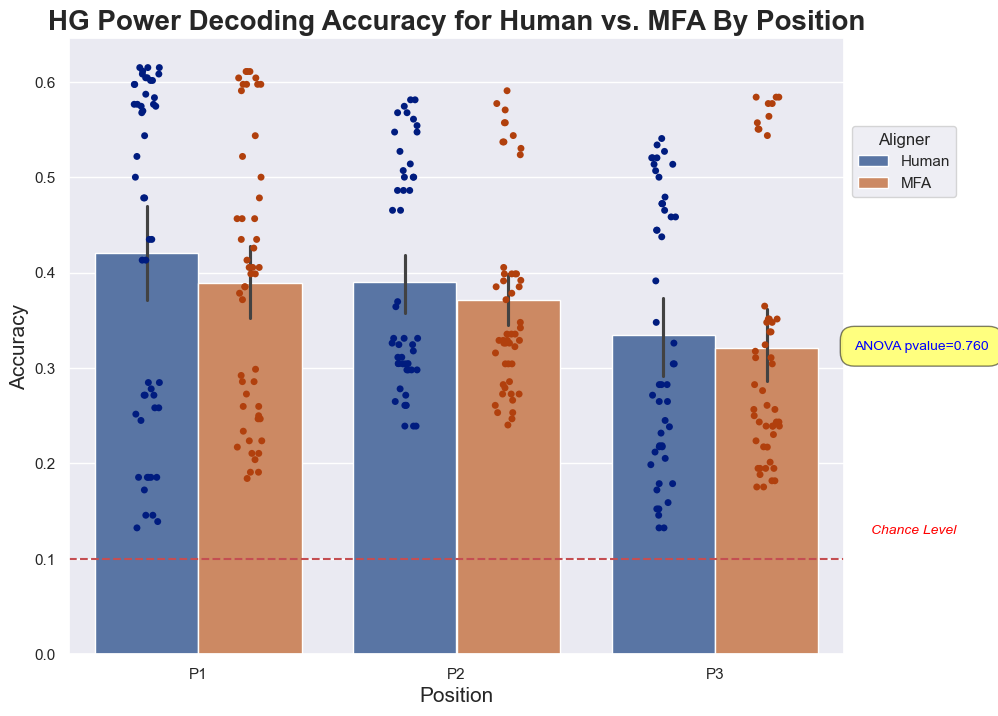

In [4]:
from statsmodels.stats.anova import AnovaRM

model = AnovaRM(Accuracy_df_Kumar_MFA, depvar='Accuracy', subject='Patient', within=['Position', 'Aligner'], 
                aggregate_func='mean')
result = model.fit().anova_table
print(result)

sns.set_theme(style="darkgrid")

fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(data=Accuracy_df_Kumar_MFA, hue='Aligner', y='Accuracy', ax=ax, x='Position')
sns.stripplot(data=Accuracy_df_Kumar_MFA, hue='Aligner', y='Accuracy', ax=ax, dodge=True, legend=False, palette='dark', x='Position')
# baseline level is basically 1/9. add a baseline/ chance level
plt.axhline(y = 0.1, color = 'r', linestyle = '--')
ax.set_title('HG Power Decoding Accuracy for Human vs. MFA By Position', fontsize=20, fontweight='bold', fontname='Arial')
ax.set_xlabel('Position', fontsize=15)
ax.set_ylabel('Accuracy', fontsize=15)
# put the pvalue up there

pvalue = result.loc['Position:Aligner', 'Pr > F']
ax.text(1.1, 0.5, f"ANOVA pvalue={pvalue:.3f}", fontsize=10, ha='center', va='center', transform=ax.transAxes,
        color='blue', bbox=dict(facecolor='yellow', alpha=0.5, edgecolor='black', boxstyle='round,pad=1'))

ax.text(1.09, 0.2, f"Chance Level", fontsize=10, ha='center', va='center', transform=ax.transAxes,
        fontstyle='italic', color='red')
# put legend outside the plot to the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8), title='Aligner')
plt.show()



In [5]:
result

,F Value,Num DF,Den DF,Pr > F
Position,2.229183,2.0,8.0,0.170026
Aligner,0.441029,1.0,4.0,0.542950
Position:Aligner,0.284177,2.0,8.0,0.759924


                   F Value  Num DF  Den DF    Pr > F
Position          1.258714     2.0     6.0  0.349565
Aligner           0.342838     1.0     3.0  0.599329
Position:Aligner  0.140348     2.0     6.0  0.871827


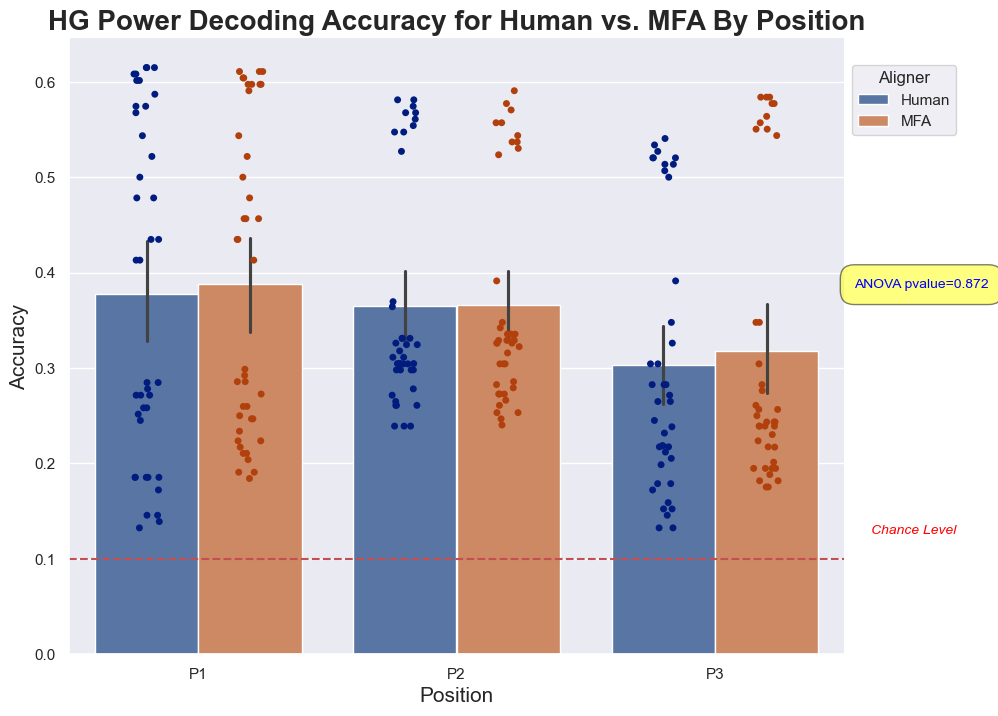

In [6]:
#### repeat the whole thing but excluding patient S14

model_noS14 = AnovaRM(Accuracy_df_Kumar_MFA_noS14, depvar='Accuracy', subject='Patient', within=['Position', 'Aligner'],
                            aggregate_func='mean')
result_noS14 = model_noS14.fit().anova_table
print(result_noS14)


sns.set_theme(style="darkgrid")

fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(data=Accuracy_df_Kumar_MFA_noS14, hue='Aligner', y='Accuracy', ax=ax, x='Position')
sns.stripplot(data=Accuracy_df_Kumar_MFA_noS14, hue='Aligner', y='Accuracy', ax=ax, dodge=True, legend=False, palette='dark', x='Position')
# baseline level is basically 1/9. add a baseline/ chance level
plt.axhline(y = 0.1, color = 'r', linestyle = '--')
ax.set_title('HG Power Decoding Accuracy for Human vs. MFA By Position', fontsize=20, fontweight='bold', fontname='Arial')
ax.set_xlabel('Position', fontsize=15)
ax.set_ylabel('Accuracy', fontsize=15)
# put the pvalue up there

pvalue = result_noS14.loc['Position:Aligner', 'Pr > F']
ax.text(1.1,0.6, f"ANOVA pvalue={pvalue:.3f}", fontsize=10, ha='center', va='center', transform=ax.transAxes,
        color='blue', bbox=dict(facecolor='yellow', alpha=0.5, edgecolor='black', boxstyle='round,pad=1'))

ax.text(1.09, 0.2, f"Chance Level", fontsize=10, ha='center', va='center', transform=ax.transAxes,
        fontstyle='italic', color='red')
# put legend outside the plot to the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.9), title='Aligner')
sns.despine()
plt.show()


## All positions, by Patients, Kumar vs. MFA


          Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  Accuracy
No. Observations:  300      Method:              REML    
No. Groups:        5        Scale:               0.0048  
Min. group size:   60       Log-Likelihood:      357.0271
Max. group size:   60       Converged:           Yes     
Mean group size:   60.0                                  
---------------------------------------------------------
               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept       0.382    0.061  6.211 0.000  0.261  0.502
Aligner[T.MFA] -0.021    0.008 -2.631 0.009 -0.037 -0.005
Patient Var     0.019    0.193                           



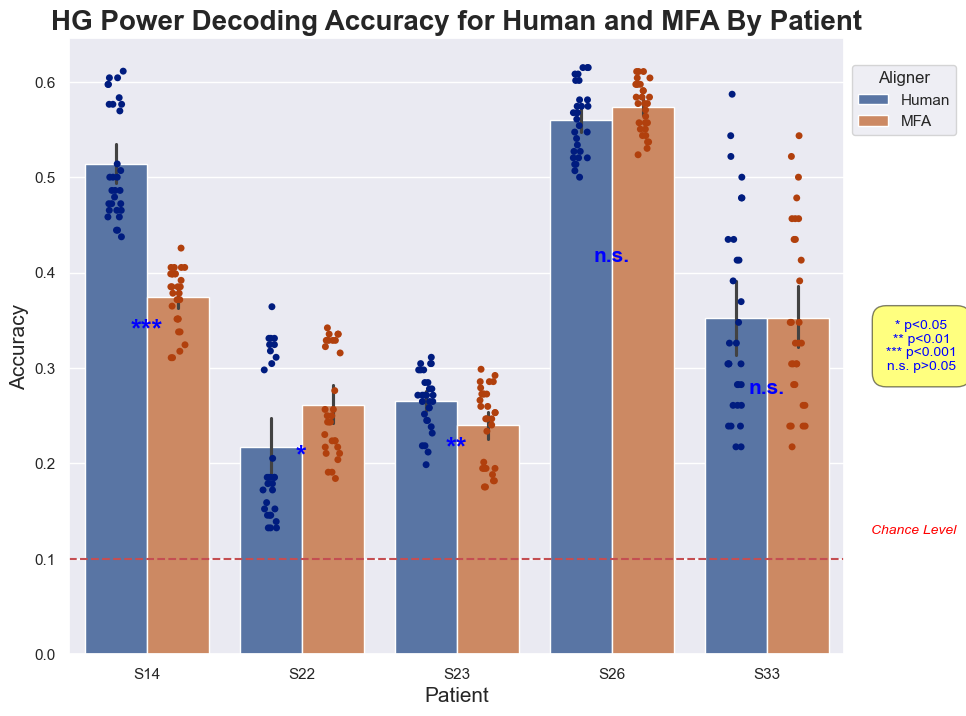

In [7]:
## All positions, by Patients, Kumar vs. MFA
# first we need a mixed effects model to see if there is a significant difference between Kumar and MFA within each patient

import statsmodels.formula.api as smf
import statsmodels.api as sm

model = smf.mixedlm('Accuracy ~ Aligner', data=Accuracy_df_Kumar_MFA, groups='Patient')
result = model.fit()
print(result.summary())



# let's modify the plot above by getting the pvalue of each two comparisons. 
# aka, kumar vs. mfa for every patient 

pvalue_results = {}
patients = ['S14', 'S22', 'S23', 'S26', 'S33']
# since the effects were significant, we need to do a post-hoc test
# import pairwise_tukeyhsd

from statsmodels.stats.multicomp import pairwise_tukeyhsd

for patient in patients:
        data = Accuracy_df_Kumar_MFA[Accuracy_df_Kumar_MFA['Patient'] == patient]
        tukey = pairwise_tukeyhsd(endog=data['Accuracy'], groups=data['Aligner'], alpha=0.05)
        pvalue_results[patient] = tukey.pvalues

# now replot your plot, making sure that you add the pvalues to the plot, on top of the bars

fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(data=Accuracy_df_Kumar_MFA, hue='Aligner', y='Accuracy', ax=ax, x='Patient')
sns.stripplot(data=Accuracy_df_Kumar_MFA, hue='Aligner', y='Accuracy', ax=ax, dodge=True, legend=False, palette='dark', x='Patient')
# baseline level is basically 1/9. add a baseline/ chance level
plt.axhline(y = 0.1, color = 'r', linestyle = '--')
ax.set_title('HG Power Decoding Accuracy for Human and MFA By Patient', fontsize=20, fontweight='bold', fontname='Arial')
ax.set_xlabel('Patient', fontsize=15)
ax.set_ylabel('Accuracy', fontsize=15)
# chance level
ax.text(1.09, 0.2, f"Chance Level", fontsize=10, ha='center', va='center', transform=ax.transAxes,
        fontstyle='italic', color='red')
# put the pvalues up there
for i, patient in enumerate(patients):
    bar_top = np.mean(Accuracy_df_Kumar_MFA[Accuracy_df_Kumar_MFA['Patient'] == patient]['Accuracy']) + 0.08
    bar_x = i/5 + 0.5/5
    # get the pvalues
    pvalue = pvalue_results[patient]
    # use line, or star for significance
    if pvalue[0] < 0.001:
        ax.text(bar_x, bar_top, '***', fontsize=20, ha='center', va='center', color='blue', transform=ax.transAxes, 
                fontweight='bold', fontname='Arial')
    elif pvalue[0] < 0.01:
        ax.text(bar_x, bar_top, '**', fontsize=20, ha='center', va='center', color='blue', transform=ax.transAxes, 
                fontweight='bold', fontname='Arial')
    elif pvalue[0] < 0.05:
        ax.text(bar_x, bar_top, '*', fontsize=20, ha='center', va='center', color='blue', transform=ax.transAxes, 
                fontweight='bold', fontname='Arial')
    else:
        ax.text(bar_x, bar_top, 'n.s.', fontsize=15, ha='center', va='center', color='blue', transform=ax.transAxes, 
                fontweight='bold', fontname='Arial')
# show what the stars mean in the legend
ax.text(1.1, 0.5, f"* p<0.05\n** p<0.01\n*** p<0.001\nn.s. p>0.05", fontsize=10, ha='center', va='center', transform=ax.transAxes,
        color='blue', bbox=dict(facecolor='yellow', alpha=0.5, edgecolor='black', boxstyle='round,pad=1'))
# put legend outside the plot to the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.9), title='Aligner')
plt.show()





In [8]:
result.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
          Mixed Linear Model Regression Results
=========================================================
Model:             MixedLM  Dependent Variable:  Accuracy
No. Observations:  300      Method:              REML    
No. Groups:        5        Scale:               0.0048  
Min. group size:   60       Log-Likelihood:      357.0271
Max. group size:   60       Converged:           Yes     
Mean group size:   60.0                                  
---------------------------------------------------------
               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept       0.382    0.061  6.211 0.000  0.261  0.502
Aligner[T.MFA] -0.021    0.008 -2.631 0.009 -0.037 -0.005
Patient Var     0.019    0.193                           
=========================================================

"""

## By Patient, by position, Kumar vs. MFA

In [9]:
## By Patient, by position, Kumar vs. MFA

# starting with the mixed effects model
# we need to see if there is a significant difference between Kumar and MFA within each patient and position 
# formula: Accuracy ~ Annotator + Position + Annotator:Position
# can we add patient also as a random effect?

model = smf.mixedlm("""Accuracy ~ Aligner + Position + Aligner:Position 
                    + Aligner:Patient + Position:Patient""", 
                    data=Accuracy_df_Kumar_MFA, groups='Patient')
result = model.fit()
print(result.summary())


                   Mixed Linear Model Regression Results
Model:                   MixedLM        Dependent Variable:        Accuracy
No. Observations:        300            Method:                    REML    
No. Groups:              5              Scale:                     0.0009  
Min. group size:         60             Log-Likelihood:            552.6815
Max. group size:         60             Converged:                 Yes     
Mean group size:         60.0                                              
---------------------------------------------------------------------------
                              Coef.   Std.Err.     z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                      0.567      0.031  18.538 0.000  0.507  0.627
Aligner[T.MFA]                -0.149      0.009 -16.552 0.000 -0.167 -0.132
Position[T.P2]                -0.058      0.010  -5.650 0.000 -0.078 -0.038
Position[T.P3]                -

c:\Users\Nabiya\Anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [10]:
result.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Mixed Linear Model Regression Results
===========================================================================
Model:                   MixedLM        Dependent Variable:        Accuracy
No. Observations:        300            Method:                    REML    
No. Groups:              5              Scale:                     0.0009  
Min. group size:         60             Log-Likelihood:            552.6815
Max. group size:         60             Converged:                 Yes     
Mean group size:         60.0                                              
---------------------------------------------------------------------------
                              Coef.   Std.Err.     z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                      0.567      0.031  18.538 0.000  0.507  0.627
Aligner[T.MFA]                -0.149      0.009 -16.552 0.000 -0.167 -0.132
Position[T.P2]                -0.058      0.010  -5.650 0.000 -0.078 -0.038
Position[T.P3]                -0.104      0.010 -10.123 0.000 -0.124 -0.084
Aligner[T.MFA]:Position[T.P2]  0.012      0.008   1.474 0.140 -0.004  0.029
Aligner[T.MFA]:Position[T.P3]  0.018      0.008   2.144 0.032  0.002  0.034
Aligner[Human]:Patient[T.S22] -0.396      0.043  -9.185 0.000 -0.481 -0.312
Aligner[MFA]:Patient[T.S22]   -0.212      0.043  -4.922 0.000 -0.297 -0.128
Aligner[Human]:Patient[T.S23] -0.282      0.043  -6.530 0.000 -0.366 -0.197
Aligner[MFA]:Patient[T.S23]   -0.168      0.043  -3.893 0.000 -0.253 -0.083
Aligner[Human]:Patient[T.S26]  0.030      0.043   0.704 0.481 -0.054  0.115
Aligner[MFA]:Patient[T.S26]    0.184      0.043   4.265 0.000  0.099  0.269
Aligner[Human]:Patient[T.S33] -0.088      0.043  -2.034 0.042 -0.172 -0.003
Aligner[MFA]:Patient[T.S33]    0.052      0.043   1.211 0.226 -0.032  0.137
Position[T.P2]:Patient[T.S22]  0.190      0.013  14.405 0.000  0.164  0.216
Position[T.P3]:Patient[T.S22]  0.109      0.013   8.232 0.000  0.083  0.135
Position[T.P2]:Patient[T.S23]  0.063      0.013   4.740 0.000  0.037  0.089
Position[T.P3]:Patient[T.S23]  0.039      0.013   2.963 0.003  0.013  0.065
Position[T.P2]:Patient[T.S26]  0.008      0.013   0.625 0.532 -0.018  0.034
Position[T.P3]:Patient[T.S26]  0.038      0.013   2.877 0.004  0.012  0.064
Position[T.P2]:Patient[T.S33] -0.124      0.013  -9.416 0.000 -0.150 -0.099
Position[T.P3]:Patient[T.S33] -0.097      0.013  -7.315 0.000 -0.123 -0.071
Patient Var                    0.001 572401.643                            
===========================================================================

"""

In [11]:
# can we do a post-hoc test for each patient and position?

pvalue_results = {}
patients = ['S14', 'S22', 'S23', 'S26', 'S33']
positions = ['P1', 'P2', 'P3']

for patient in patients:
    # initate the dictionary
    pvalue_results[patient] = {}
    for position in positions:
        data = Accuracy_df_Kumar_MFA[(Accuracy_df_Kumar_MFA['Patient'] == patient) & (Accuracy_df_Kumar_MFA['Position'] == position)]
        tukey = pairwise_tukeyhsd(endog=data['Accuracy'], groups=data['Aligner'], alpha=0.05)
        print(f"Patient {patient}, Position {position} Human vs. MFA")
        print(tukey)
        print('\n')
        pvalue_results[patient][position] = tukey.pvalues


Patient S14, Position P1 Human vs. MFA
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
 Human    MFA  -0.1936   0.0 -0.2081 -0.1792   True
---------------------------------------------------


Patient S14, Position P2 Human vs. MFA
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
 Human    MFA  -0.0998   0.0 -0.1128 -0.0867   True
---------------------------------------------------


Patient S14, Position P3 Human vs. MFA
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
 Human    MFA  -0.1246   0.0 -0.1405 -0.1087   True
---------------------------------------------------


Patient S22, Position P1 Human vs. MFA
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1

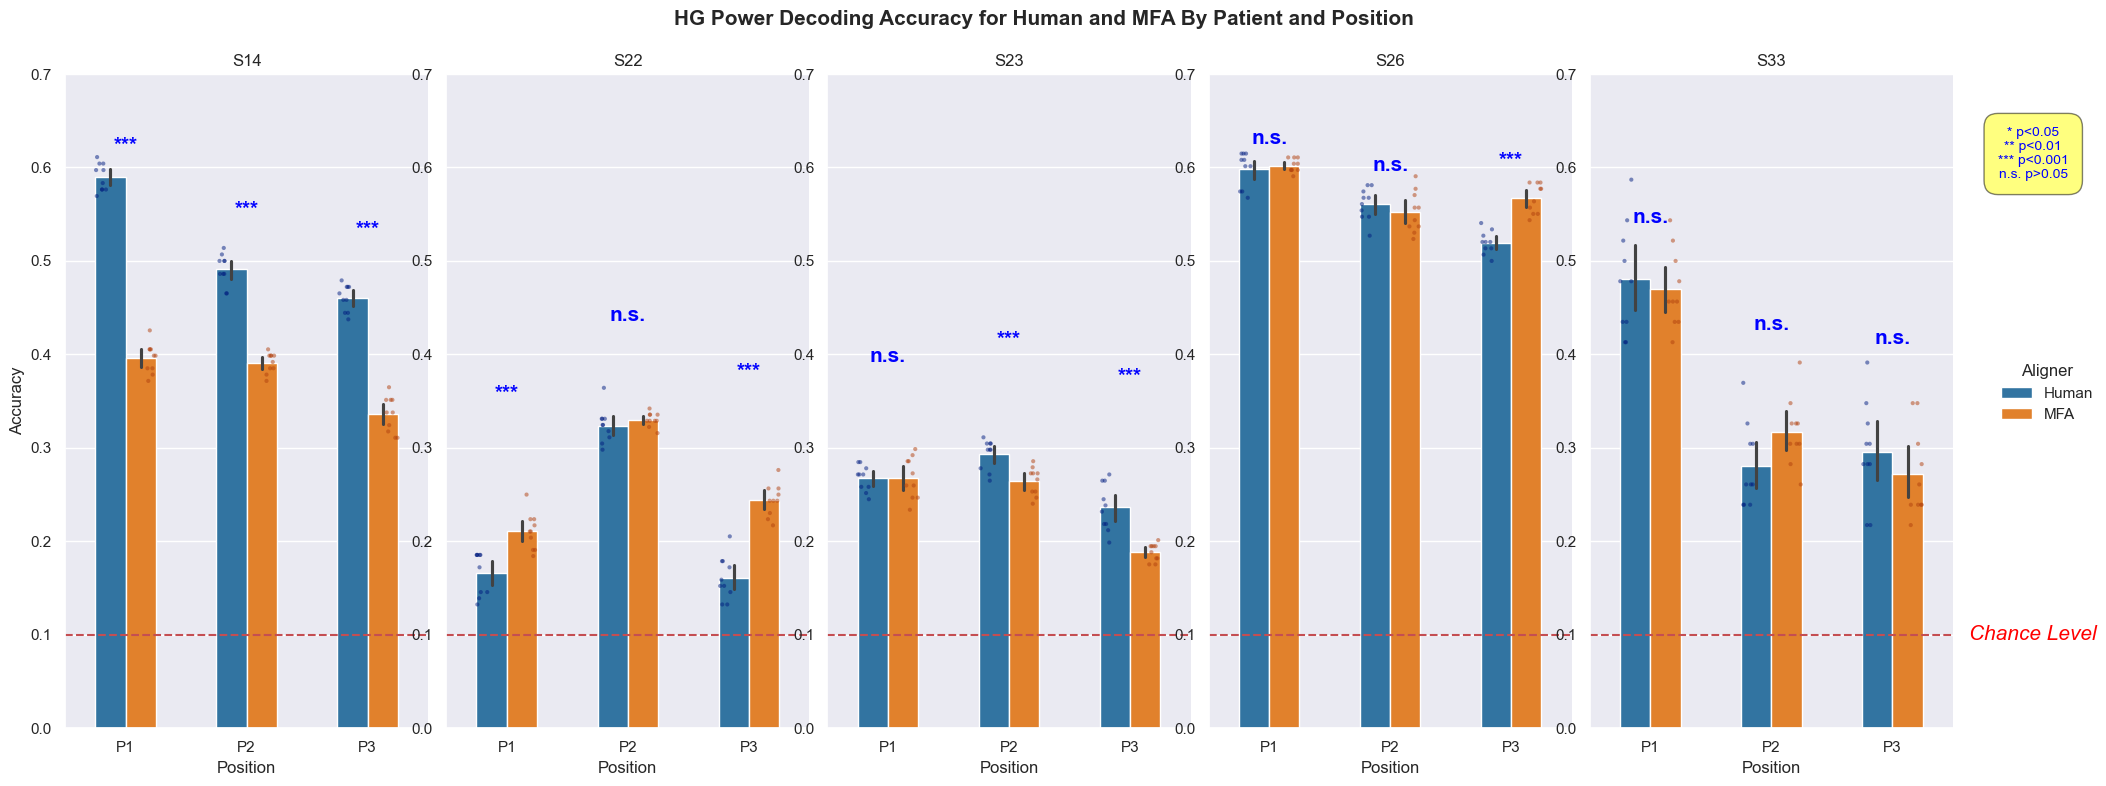

In [12]:

# now plot your data, we want to see the accuracy for each patient, by position, and by annotator
# we also want to see the pvalues for each comparison
# hue is annotator, x is patient, y is accuracy, and we want to separate by position, but how?

g = sns.FacetGrid(Accuracy_df_Kumar_MFA, col='Patient', col_wrap=5, height=8, aspect=0.5, 
                    sharey=True) 
g.map_dataframe(sns.barplot, x='Position', y='Accuracy', hue='Aligner', palette = 'tab10', dodge=True, width=0.5)
g.map_dataframe(sns.stripplot, x='Position', y='Accuracy', hue='Aligner', dodge=True, palette='dark', size=3, alpha=0.5, legend=False)
g.set_titles('{col_name}')
g.set_axis_labels('Position', 'Accuracy')
g.add_legend(title='Aligner')
# baseline level is basically 1/9. add a baseline/ chance level
g.map(plt.axhline, y=0.1, color='r', linestyle='--')
g.fig.suptitle('HG Power Decoding Accuracy for Human and MFA By Patient and Position', fontsize=15, fontweight='bold', fontname='Arial')
g.fig.subplots_adjust(top=0.9)
# put the pvalues up there
for i, patient in enumerate(patients):
    for j, position in enumerate(positions):
        # bar_top is the mean of whichever annotator is higher, plus 0.2
        higher_annotator = Accuracy_df_Kumar_MFA[(Accuracy_df_Kumar_MFA['Patient'] == patient) & (Accuracy_df_Kumar_MFA['Position'] == position)].groupby('Aligner')['Accuracy'].mean().idxmax()
        bar_top = np.mean(Accuracy_df_Kumar_MFA[(Accuracy_df_Kumar_MFA['Patient'] == patient) & (Accuracy_df_Kumar_MFA['Position'] == position) & (Accuracy_df_Kumar_MFA['Aligner'] == higher_annotator)]['Accuracy']) + 0.3
        bar_x = j/3 + 0.5/3
        # get the pvalues
        pvalue = pvalue_results[patient][position]
        # use line, or star for significance
        if pvalue[0] < 0.001:
            g.axes[i].text(bar_x, bar_top, '***', fontsize=15, ha='center', va='center', color='blue', transform=g.axes[i].transAxes, 
                    fontweight='bold', fontname='Arial')
        elif pvalue[0] < 0.01:
            g.axes[i].text(bar_x, bar_top, '**', fontsize=15, ha='center', va='center', color='blue', transform=g.axes[i].transAxes, 
                    fontweight='bold', fontname='Arial')
        elif pvalue[0] < 0.05:
            g.axes[i].text(bar_x, bar_top, '*', fontsize=15, ha='center', va='center', color='blue', transform=g.axes[i].transAxes, 
                    fontweight='bold', fontname='Arial')
        else:
            g.axes[i].text(bar_x, bar_top, 'n.s.', fontsize=15, ha='center', va='center', color='blue', transform=g.axes[i].transAxes, 
                    fontweight='bold', fontname='Arial')
# add chance level text 
g.fig.text(0.97, 0.2, f"Chance Level", fontsize=15, ha='center', va='center',
        fontstyle='italic', color='red')

# show what the stars mean in the legend
g.fig.text(0.97, 0.8, f"* p<0.05\n** p<0.01\n*** p<0.001\nn.s. p>0.05", fontsize=10, ha='center', va='center',
        color='blue', bbox=dict(facecolor='yellow', alpha=0.5, edgecolor='black', boxstyle='round,pad=1'))
for ax in g.axes:
    ax.tick_params(axis='y', which='both', labelleft=True)
# define what the ytixks should be
yticks = np.arange(0, 0.8, 0.1)
for ax in g.axes:
    ax.set_yticks(yticks)
plt.show()

            

In [13]:
#df_melted = pd.read_csv(r"C:\Users\amh209\Box\Academic-Duke\CoganLab\Summer 2024\intraop\ieeg_data_intraop\df_melted.csv")
# change amh209 to Nabiya
df_melted = pd.read_csv(r"C:\Users\Nabiya\Box\Academic-Duke\CoganLab\Summer 2024\intraop\ieeg_data_intraop\df_melted.csv")
df_melted.head()

fig = px.box(df_melted, x="Patient", y="Time", facet_col="Difference_Variable", color="Position",
                hover_name='Phoneme', hover_data=['V_C'], points="all").update_traces(marker=dict(size=4, opacity=0.6), boxmean=True,
                                                                                                        jitter=0.3)

fig.update_layout(title=f"Phoneme Time Differences ({df_melted.shape[0]//3} observations)",
                    yaxis_title="Time (s)",
                    showlegend=True, 
                    height=400, 
                    width=1500, 
                    font=dict(size=12))
# remove the word "Difference" from the facet_col title
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
# remove patient from the facet_col x axis
fig.update_yaxes(range=[-0.15, 0.28])
fig.update_xaxes(title_text="")
fig.show()


# Word Error Rate (WER)

- **N**: Total number of phrases in the block.
$$
\text{WER} = \frac{\sum_{i=1}^{N} \text{edit\_distance}(\text{predicted}_i, \text{target}_i)}{\sum_{i=1}^{N} \text{num\_words}(\text{target}_i)}
$$

# Understanding Gated Recurrent Unit (GRU) Architecture

- **Inputs and States**
  - $x_t$: Current input at time $t$
  - $c^{t-1}$: Previous hidden state

- **Gates in GRU**
  - **Update Gate ($z_t$)**
	- Determines the extent of past information to carry forward
	- Formula: $z_t = \sigma(U_z x_t + W_z c^{t-1})$
	
  - **Reset Gate ($r_t$)**
	- Decides how much past information to forget
	- Formula: $r_t = \sigma(U_r x_t + W_r c^{t-1})$



- **Candidate Hidden State ($\tilde{C}_t$)**
  - Combines current input with gated past state
  - Formula: $\tilde{C}_t = \text{tanh}(U_c x_t + W_c (r_t \odot c^{t-1}))$

- **Final Hidden State ($c^t$)**
  - Update and reset gates influence the final state
  - Formula: $c^t = z_t \odot c^{t-1} + (1 - z_t) \odot \tilde{C}_t$

- **Output**
  - $c^t$ serves as the output and the new hidden state for the next time step